# Sampling
## 샘플링은 왜 할까요?
먼저 클래스 불균형 문제를 이야기 해보겠습니다. <br> 
클래스 불균형 문제란, 분류를 목적으로하는 데이터 셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말합니다. <br>
이런 경우, 모델이 각 클래스의 데이터를 제대로 학습하기 어려워집니다. 따라서 각 클래스별 균형을 맞추는 작업이 필요합니다.<br>
#### 샘플링은 다음과 같이 크게 두 가지로 나눌 수 있습니다.
* 적은 클래스의 데이터 수를 증가 시키는 Oversampling
* 많은 클래스의 데이터 수를 감소 시키는 Undersampling

## 1. Random Over, Under Sampling
가장 쉽게 (Over, Under) 샘플링 하는 방법은 임의(Random)로 데이터를 선택하여, 복제하거나 제거하는 방식을 사용할 수 있습니다.
하지만, 이러한 방식은 몇가지 문제점이 있습니다. 
* 복제하는 경우, 선택된 데이터의 위치에 똑같이 점을 찍기 때문에 데이터 자체에 과적합될 수 있음
* 제거하는 경우, 데이터셋이 가지고 있는 정보의 손실이 생길 수 있음

샘플링 알고리즘은 클래스 불균형 처리를 위한 imblearn(imbalanced-learn) 라이브러리에 있습니다.<br>
Random Over, Under Sampler는 imblearn 라이브러리의 over_sampling, under_sampling 패키지에 있습니다.

# 불균형 문제

예를 들어 불량률 탐지의 경우 예측 값이 매우 적기 때문에 맞추기 어려움 따라서
Sampling을 통해서 클래스의 불균형을 맞추는 것이 좋음

## 2. SMOTE(Synthetic Minority Oversampling Technique)
임의 Over, Under 샘플링은 데이터의 중복으로 인한 과적합 문제와 데이터 손실의 문제가 있었습니다.<br>
그런 문제를 최대한 피하면서 데이터를 생성하는 알고리즘인 SMOTE에 대해 알아보겠습니다. <br>
SMOTE의 기본 개념은 어렵지 않습니다. 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성합니다.<br>
SMOTE의 장점으로는 데이터의 손실이 없으며 임의 Over 샘플링을 하였을 때 보다 과적합을 완화 시킬 수 있습니다.<br>

전복 데이터셋은 SMOTE로 생성되는 데이터 샘플을 살펴보기 어려우므로, 임의의 데이터 샘플을 생성해 살펴보겠습니다.<br>
1000개의 데이터 샘플이 5 : 15 : 80 비율로 되어있으며, 2차원 데이터를 생성합니다. 

SMOTE는 imblearn 라이브러리의 over_sampling 패키지에 있습니다.

# 데이터 분포도 변환 전 학습 결과

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
card_df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/Credit Data/creditcard.csv')
card_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
156752,108853.0,-1.137303,-1.714268,-1.734631,-0.229889,3.200464,-1.111822,1.398919,-0.500327,1.029354,-0.827460,0.665168,-1.933139,1.998286,2.119351,-0.729720,-2.089643,1.188293,-1.552863,-1.522075,0.667770,0.709829,1.879947,0.857547,-1.017207,-1.222735,0.114396,-0.002218,0.135744,250.00,0
137964,82417.0,1.255857,0.313327,0.294346,0.699049,-0.422540,-1.086885,0.048262,-0.171604,0.118444,-0.265997,-0.162761,-0.066903,-0.341850,-0.174507,1.156225,0.505105,0.027240,-0.229597,-0.194646,-0.117129,-0.294118,-0.876384,0.136186,0.329826,0.196860,0.096305,-0.026785,0.029606,1.79,0
225641,144335.0,-4.520823,4.583674,-2.341541,-0.820654,-0.317298,1.940869,-4.123484,-12.909527,0.679429,0.126405,0.319993,0.834026,-1.606264,0.431046,-0.157801,0.498624,1.442462,1.697212,0.010926,-2.981829,13.397103,-3.373476,1.741238,-0.808488,-0.161056,-0.039978,0.663529,0.307360,2.99,0
204770,135442.0,-1.045681,-0.307611,1.564732,-1.234838,-0.601713,0.404766,1.073561,-0.258829,0.186797,-0.717571,0.936208,0.549692,0.533597,-0.244389,0.992688,-0.030406,-0.571195,0.837242,1.542984,0.317655,0.187758,0.759184,-0.295725,-0.285866,0.339992,0.977470,-0.203704,-0.162157,248.00,0
272118,164920.0,-0.993075,1.815117,1.487661,4.081916,0.224118,2.137065,0.159752,0.866884,-2.157679,1.305685,-0.123200,0.098764,0.393602,0.291885,-0.318352,0.279264,0.055555,0.376169,2.029943,0.299037,-0.382491,-1.113539,0.016585,-0.035067,0.025579,0.063774,0.124988,0.064395,75.64,0
18731,29724.0,-0.832272,0.956283,1.953828,-1.081691,0.324973,-0.837771,0.991201,-0.021494,-0.515351,-1.136568,-0.010106,0.420149,0.243921,0.033323,0.011002,0.442375,-0.657330,-1.152412,-2.137462,-0.258686,-0.133153,-0.486333,-0.064068,0.377886,-0.051410,-0.194289,0.015343,0.085935,1.98,0
117384,74657.0,-1.388172,0.308029,-0.238107,-0.582165,-1.692393,-0.319129,2.293982,-0.079040,-0.245561,-0.959963,-0.881178,0.070051,-0.074749,0.254347,-0.570801,0.125119,-0.142947,-0.552944,-0.310312,-0.105677,0.027006,0.292861,0.571234,0.475148,-0.341663,0.842885,0.262775,0.024239,425.16,0
103057,68478.0,1.221222,0.285919,0.182739,0.503424,-0.137865,-0.548674,0.003721,-0.051008,-0.241359,-0.124142,1.374699,0.940526,0.439482,-0.156511,0.392792,0.762221,-0.390769,0.277559,0.212721,-0.026881,-0.250145,-0.763751,0.065547,-0.035540,0.235594,0.095983,-0.027321,0.019200,9.99,0
78130,57383.0,-0.503037,0.980406,-1.111121,0.198860,2.197922,3.625224,0.098469,1.271804,-0.733887,-0.101030,-0.686669,-0.038535,-0.101257,0.670915,0.364495,-0.408584,-0.124431,0.366178,1.256144,0.262428,0.100514,0.226208,0.042676,1.015070,-0.209087,-0.246546,0.322495,0.195843,65.08,0
182180,125294.0,0.020698,0.737509,0.160737,-0.766295,0.538670,-0.639716,0.842027,0.011605,-0.144558,-0.215317,0.331006,0.237077,-0.927787,0.470872,-0.980490,0.239138,-0.723575,-0.036889,0.332045,-0.073530,-0.239736,-0.592394,0.030656,-0.367890,-0.507118,0.143673,0.236681,0.082133,3.87,0


In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8611, 재현율: 0.6284,    F1: 0.7266, AUC:0.9568


In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


# 데이터 분포도 변환 후 학습 결과

## Scalling

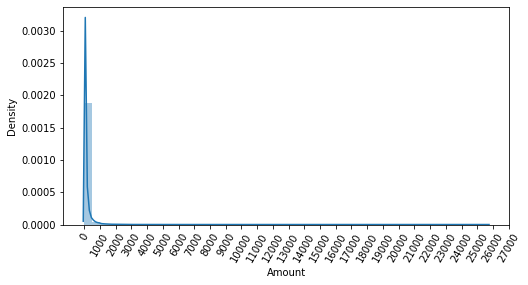

In [ ]:
# Amount의 분포 확인
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

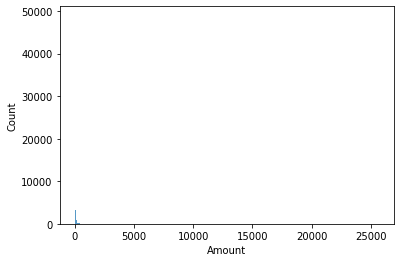

In [ ]:
sns.histplot(card_df['Amount'])

### 표준화 적용

In [ ]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
df_copy = get_preprocessed_df(card_df)

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

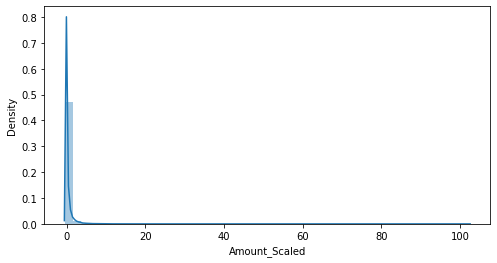

In [ ]:
# 표준화 적용 후 Amount의 분포 확인
plt.figure(figsize=(8, 4))
sns.distplot(df_copy['Amount_Scaled'])

In [ ]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9773


### 로그 변환 후

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = card_df['Amount'].map(lambda x : np.log(x, where=(x != 0)))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
df_copy = get_preprocessed_df(card_df)

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

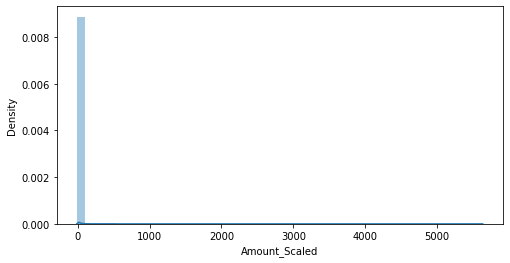

In [ ]:
# 로그 변환 후 Amount의 분포 확인
plt.figure(figsize=(8, 4))
sns.distplot(df_copy['Amount_Scaled'])

In [ ]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081,    F1: 0.7200, AUC:0.9712
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9652, 재현율: 0.7500,    F1: 0.8441, AUC:0.9800


### 이상치 데이터 제거 + 로그 변환 후

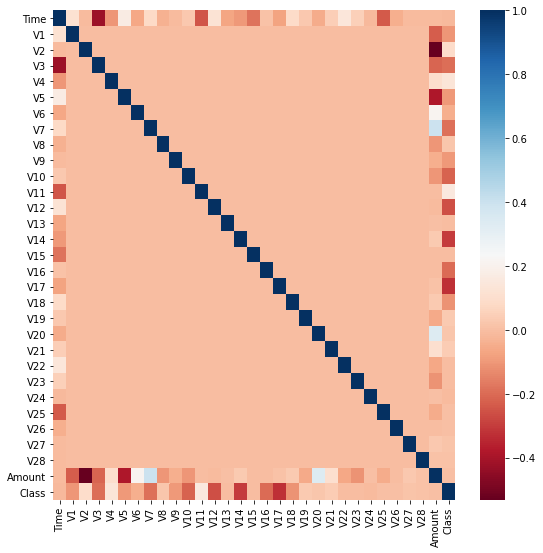

In [ ]:
plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,-0.009,0.031,-0.248,0.124,-0.066,-0.099,-0.183,0.012,-0.073,0.090,0.029,-0.051,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.228,-0.101
V2,-0.011,0.000,1.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.531,0.091
V3,-0.420,-0.000,0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.211,-0.193
V4,-0.105,0.000,-0.000,-0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.099,0.133
V5,0.173,0.000,-0.000,-0.000,-0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.386,-0.095
V6,-0.063,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.216,-0.044
V7,0.085,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.397,-0.187
V8,-0.037,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.103,0.020
V9,-0.009,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.044,-0.098


In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9831


### SMOTE 오버 샘플링 적용 후

반드시 학습 데이터에만 적용해야 한다.

재현율은 증가하고 정밀도는 감소하는 경향을 보인다.

하지만 좋은 패키지일수록 재현율 증가율은 높이고 정밀도 감소율은 낮춘다

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포: 
 0    199020
1       342
Name: Class, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
dtype: int64


In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

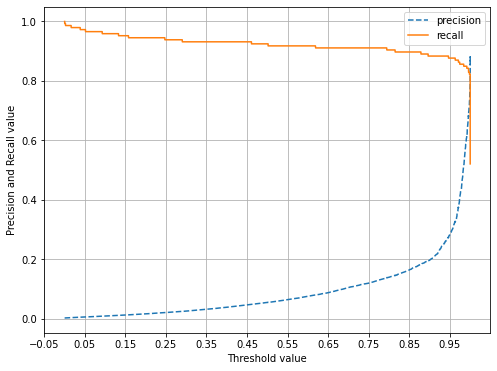

In [ ]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9789


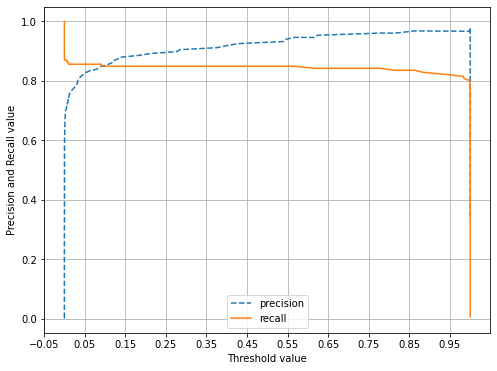

In [ ]:
lgbm_clf.fit(X_train_over, y_train_over)
pred_proba_c1 = lgbm_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot( y_test, pred_proba_c1)